In [2]:
import numpy as np


In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [4]:
 x = [[-4.535223 , -1.5143484,  3.982851 ,  2.1995668, -5.4335203,
        -5.476383 , -8.685219 , 12.729579 , -4.2230687,  0.6178443]]
x

[[-4.535223,
  -1.5143484,
  3.982851,
  2.1995668,
  -5.4335203,
  -5.476383,
  -8.685219,
  12.729579,
  -4.2230687,
  0.6178443]]

In [5]:
z = sigmoid(np.asarray(x))
z

array([[1.06107206e-02, 1.80295254e-01, 9.81708375e-01, 9.00210603e-01,
        4.34869933e-03, 4.16700091e-03, 1.69037825e-04, 9.99997038e-01,
        1.44419808e-02, 6.49728110e-01]])

In [6]:
result = (-1) * np.sum(z * np.log(z))
result

0.8591885096678078

In [7]:
!pip install sklearn

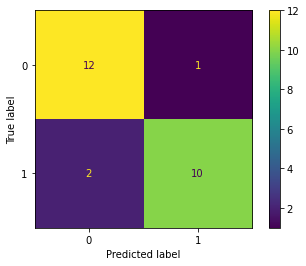

In [8]:
import sklearn
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(     X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
pred = np.array([[3, 3], [8, 8], [1, 1], [0, 1], [6, 6]])
labels = np.array([[3, 3], [8, 8], [8, 8], [0, 0], [6, 6]])
# print ( np.matmul(pred,labels))

results = pred == labels
# res = pred * results


labelClasses = [0,1,2,3,4,5,6,7,8,9]
numOutput = 2
print(results)
# print(res)

    

[[ True  True]
 [ True  True]
 [False False]
 [ True False]
 [ True  True]]


In [10]:
import pandas as pd


pred = [[3, 3], [8, 8], [1, 1], [0, 1], [6, 6]]
labels = [[3, 3], [8, 8], [8, 8], [0, 0], [6, 6]]

pred = np.array(pred)
labels = np.array(labels)


def throughputMatrix(pred, labels, num_outputs, classes, output_names=[]):
    """ generate a dictionary of lists comparing the correctly labeled predictions against the outputs for each class.        
    """    
    resultsDict = {}
    results = []
    #get truth matrix of the predictions/labels
    pred = np.array(pred)
    labels = np.array(labels)

    classCount = {}
    # print((pred))
    # print((labels))
    results = np.equal(pred, labels)
    # print(results)
    labelClasses=classes
    
    # print("----")
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = 0
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    for i, item in enumerate(results):
        for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
            if branch == True: 
                resultsDict[labels[i][j]][j] += 1
        classCount[labels[i][0]] += 1
    # print(classCount)
    resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
    renameDict={}
    for i, name in enumerate(output_names):
        renameDict[i] = name
    if len(renameDict) > 0:
        resultsDict.rename(renameDict)
    resultsDict["itemCount"] = pd.Series(classCount)

    # print(resultsDict)
    return resultsDict


In [11]:
results = throughputMatrix(pred,labels,2,[0,1,2,3,4,5,6,7,8,9])
print(results.keys())
pd.DataFrame(results).T

Index([0, 1, 'itemCount'], dtype='object')


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,1,0
itemCount,1,0,0,1,0,0,1,0,2,0


In [12]:
##### entropy matrix


In [95]:
def entropyMatrix(entropy, labels, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        entropy: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    # print(entropy)
    # print(labels)
    resultsDict = {}
    results = np.array(entropy)
    labels = np.array(labels)
    classCount = {}
    labelClasses=classes
    
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = []
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    for i, item in enumerate(results):
        for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
#             if branch == True: 
            resultsDict[labels[i][j]][j].append(branch)
        classCount[labels[i][0]] += 1
    # print(classCount)
    
    resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
    for column in resultsDict:
        resultsDict[column] = [np.array(x).mean() for x in resultsDict[column].values]
    renameDict={}
    for i, name in enumerate(output_names):
        renameDict[i] = name
    print("rename:{}".format(renameDict))
    if len(renameDict) > 0:
        print("rename!")
        resultsDict = resultsDict.rename(renameDict,axis ="columns")
    resultsDict["itemCount"] = pd.Series(classCount)
    return resultsDict

In [96]:
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]

y = entropyMatrix(entropy, labels, 4,[0,1,2,3,4,5,6,7,8,9])
print(y)


[[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
[[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
rename:{}
          0         1         2         3  itemCount
0  0.005653  1.391791  0.337705  1.656682          4
1       NaN       NaN       NaN       NaN          0
2       NaN       NaN       NaN       NaN          0
3  0.021179  1.714511  1.123505  0.028545          4
4       NaN       NaN       NaN       NaN          0
5       NaN       NaN       NaN       NaN          0
6  0.043272  0.953795  0.834291  0.010300          4
7       NaN       NaN       NaN       NaN          0
8  0.582695  0.385682  0

C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice.
C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [125]:


def entropyConfusionMatrix(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
#     print(pred)
#     print(labels)
    resultsDict = {}
    results = []
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    results = pred
    labelClasses=classes
    from sklearn.metrics import confusion_matrix
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = []
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    transpose_preds = np.transpose(results) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    for i, item in enumerate(transpose_preds):
        print("exit:{}".format(i))
        df_confusion = pd.crosstab(item, transpose_labels[i], rownames=['Actual'], colnames=['Predicted'], margins=True)
        print(df_confusion)
#         print(confusion_matrix(item,transpose_labels[i]))
        
    
    print(np.transpose(results))
#         for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
#             if branch == True: 
#             resultsDict[labels[i][j]][j].append(branch)
#         classCount[labels[i][0]] += 1
    # print(classCount)
#     print(resultsDict)
    
#     resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
# #     print(resultsDict)
#     for column in resultsDict:
# #         print(df[column])
#         resultsDict[column] = [np.array(x).mean() for x in resultsDict[column].values]
# #     resultsDict = resultsDict.mean(axis=0)
#     renameDict={}
#     for i, name in enumerate(output_names):
#         renameDict[i] = name
#     print("rename:{}".format(renameDict))
#     if len(renameDict) > 0:
#         print("rename!")
#         resultsDict = resultsDict.rename(renameDict,axis ="columns")
#     resultsDict["itemCount"] = pd.Series(classCount)
#     return resultsDict
    return

In [126]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = entropyConfusionMatrix(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9])
print(y)

exit:0
Predicted  0  3  6  8  All
Actual                    
0          1  0  0  0    1
1          0  0  0  1    1
3          0  1  0  0    1
6          0  0  1  0    1
8          0  0  0  1    1
All        1  1  1  2    5
exit:1
Predicted  0  3  6  8  All
Actual                    
1          0  0  0  1    1
3          0  1  0  0    1
6          0  0  1  0    1
8          1  0  0  1    2
All        1  1  1  2    5
exit:2
Predicted  0  3  6  8  All
Actual                    
3          0  1  0  0    1
6          0  0  1  0    1
8          1  0  0  2    3
All        1  1  1  2    5
exit:3
Predicted  0  3  6  8  All
Actual                    
1          1  0  0  1    2
3          0  1  0  0    1
6          0  0  1  0    1
8          0  0  0  1    1
All        1  1  1  2    5
[[3 8 1 0 6]
 [3 8 1 8 6]
 [3 8 8 8 6]
 [3 8 1 1 6]]
None


In [334]:
def KneeGraph(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    #graph the accuracy rate vs the entropy threshold.
    #get series of entropy values, series of 
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results)
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
#     print(transpose_results)
#     print(transpose_preds)
#     print(transpose_entropy)
#     print(transpose_labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    # ax = plt.axes()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     plt.subplots(2, 2, sharex='all', sharey='all')
    for i, branch in enumerate(transpose_entropy):
        series_branch=[]
        
        for j, ent in enumerate(branch):
            series_entropy = {}
            series_entropy["entropy"] = ent
#             print("entropy: {}".format(ent))
#             print(np.where(branch <= ent))
            series_entropy["pred"] = transpose_preds[i][np.where(branch <= ent)]
#             print(series_entropy["pred"] )
            series_entropy["labels"] = transpose_labels[i][np.where(branch <= ent)]
#             print(series_entropy["labels"] )
            series_entropy["truth"] = transpose_results[i][np.where(branch <= ent)]
#             print(series_entropy["truth"] )
            series_entropy["accuracy"] = transpose_results[i][np.where(branch <= ent)].sum()/len(transpose_results[i])
#             print(series_entropy["accuracy"])
            series_branch.append(series_entropy)
        df = pd.DataFrame(series_branch)
        df = df.sort_values(by=["entropy"])
        axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"])
#         axs[round(int(i/2)), round(i%2)].set_xlim([0,2])
        axs[round(int(i/2)), round(i%2)].set_ylim([0,1])
        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
        series.append(series_branch)
    plt.show()
    return series

<Figure size 432x288 with 0 Axes>

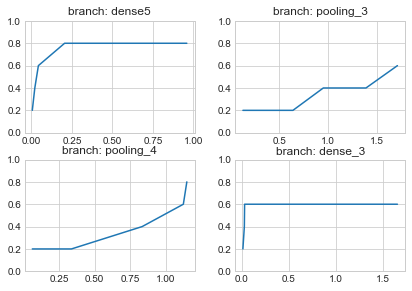

In [335]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = KneeGraph(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

In [386]:
def KneeGraphClasses(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    #graph the accuracy rate vs the entropy threshold.
    #get series of entropy values, series of 
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results)
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
#     print(transpose_results)
#     print(transpose_preds)
#     print(transpose_entropy)
#     print(transpose_labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    # ax = plt.axes()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     plt.subplots(2, 2, sharex='all', sharey='all')
    for i, branch in enumerate(transpose_entropy):
        series_branch=[]
        
        for j, ent in enumerate(branch):
            series_entropy = {}
            series_entropy["entropy"] = ent
#             print("entropy: {}".format(ent))
#             print(np.where(branch <= ent))
            series_entropy["pred"] = transpose_preds[i][np.where(branch <= ent)]
#             print(series_entropy["pred"] )
            series_entropy["labels"] = transpose_labels[i][np.where(branch <= ent)]
#             print(series_entropy["labels"] )
            series_entropy["truth"] = transpose_results[i][np.where(branch <= ent)]
            
            #grab all for entropy threshold
            #then remove all that are not labeled specific class
            series_entropy["classes"]={}
            
            for k, lClass in enumerate(labelClasses):
                series_entropy["classes"][lClass] = {}
                series_entropy["classes"][lClass]["results"]={}
                series_entropy["classes"][lClass]["results_truth"]={}
                series_entropy["classes"][lClass]["results_accuracy"]={}
                
#                 print(series_entropy["pred"][np.where(series_entropy["labels"] == lClass)])
#                 print(series_entropy["truth"][np.where(series_entropy["labels"] == lClass)])
                series_entropy["classes"][lClass]["results"]= series_entropy["pred"][np.where(series_entropy["labels"] == lClass)]
                series_entropy["classes"][lClass]["results_truth"] = series_entropy["truth"][np.where(series_entropy["labels"] == lClass)]
                series_entropy["classes"][lClass]["results_accuracy"] = series_entropy["truth"][np.where(series_entropy["labels"] == lClass)].sum()/len(series_entropy["truth"][np.where(series_entropy["labels"] == lClass)])
                print(series_entropy["classes"])
    
    
#             print(series_entropy["truth"] )
            series_entropy["accuracy"] = transpose_results[i][np.where(branch <= ent)].sum()/len(transpose_results[i])
#             print(series_entropy["accuracy"])
            series_branch.append(series_entropy)
        df = pd.DataFrame(series_branch)
        df = df.sort_values(by=["entropy"])
        
#         print()
        for j, classData in enumerate(series_entropy["classes"]):
            print(classData["results"])
#                 axs[round(int(i/2)), round(i%2)].plot(classData["entropy",df["accuracy"])
        axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"])
#         axs[round(int(i/2)), round(i%2)].set_xlim([0,2])
        axs[round(int(i/2)), round(i%2)].set_ylim([0,1])
        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
        series.append(series_branch)
#     print(series)
    plt.show()
    return series

{0: {'results': array([0]), 'results_truth': array([ True]), 'results_accuracy': 1.0}}
{0: {'results': array([0]), 'results_truth': array([ True]), 'results_accuracy': 1.0}, 1: {'results': array([], dtype=int32), 'results_truth': array([], dtype=bool), 'results_accuracy': nan}}
{0: {'results': array([0]), 'results_truth': array([ True]), 'results_accuracy': 1.0}, 1: {'results': array([], dtype=int32), 'results_truth': array([], dtype=bool), 'results_accuracy': nan}, 2: {'results': array([], dtype=int32), 'results_truth': array([], dtype=bool), 'results_accuracy': nan}}
{0: {'results': array([0]), 'results_truth': array([ True]), 'results_accuracy': 1.0}, 1: {'results': array([], dtype=int32), 'results_truth': array([], dtype=bool), 'results_accuracy': nan}, 2: {'results': array([], dtype=int32), 'results_truth': array([], dtype=bool), 'results_accuracy': nan}, 3: {'results': array([3]), 'results_truth': array([ True]), 'results_accuracy': 1.0}}
{0: {'results': array([0]), 'results_trut

C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in long_scalars


TypeError: 'int' object is not subscriptable

<Figure size 432x288 with 0 Axes>

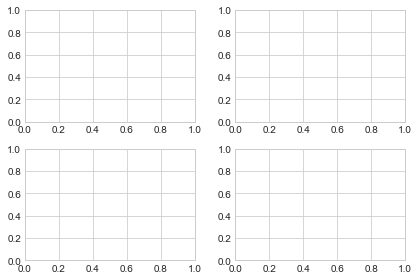

In [387]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = KneeGraphClasses(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)